In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df= pd.read_csv("earthquake data.csv")

In [3]:
df

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA
...,...,...,...,...,...,...,...
53534,5/14/2023 9:50,18.080,-103.270,7,3.5,"OFFSHORE, MICHOACAN,",MEXICO
53535,5/14/2023 9:49,11.520,141.620,10,5.1,"STATE, OF, YAP,",MICRONESIA
53536,5/14/2023 9:48,19.400,-155.240,2,2.2,"ISLAND, OF, HAWAII,",HAWAII
53537,5/14/2023 9:28,15.890,-93.520,106,3.9,"CHIAPAS,",MEXICO


In [4]:
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,53539.000000,53539.000000,53539.000000,53539.000000
mean,21.120630,-15.421862,35.799959,2.962569
std,25.645429,93.129891,67.580186,0.893910
min,-65.899000,-179.992000,-4.000000,-0.700000
25%,8.485000,-94.570000,6.000000,2.300000
50%,29.320000,-8.373000,10.000000,2.900000
75%,38.470000,37.460000,32.000000,3.500000
max,85.330000,180.000000,750.000000,7.700000


In [5]:
df.isnull().sum()

Date & Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Lands          0
Country        0
dtype: int64

In [6]:
df.head()

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA


In [7]:
df.dtypes

Date & Time     object
Latitude       float64
Longitude      float64
Depth            int64
Magnitude      float64
Lands           object
Country         object
dtype: object

# Temporal Trends

In [8]:
df['Date & Time']= pd.to_datetime(df['Date & Time'])

In [9]:
df['Month']= df['Date & Time'].dt.month
df['WeekDay']= df['Date & Time'].dt.weekday
df['Year']= df['Date & Time'].dt.year
df['Hour']= df['Date & Time'].dt.hour

In [10]:
df

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country,Month,WeekDay,Year,Hour
0,2023-11-21 17:43:00,31.592,-104.549,3,2.7,WESTERN,TEXAS,11,1,2023,17
1,2023-11-21 17:31:00,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA,11,1,2023,17
2,2023-11-21 17:27:00,31.647,-104.017,5,2.9,WESTERN,TEXAS,11,1,2023,17
3,2023-11-21 17:01:00,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA,11,1,2023,17
4,2023-11-21 16:56:00,-4.320,130.810,10,3.3,BANDA,SEA,11,1,2023,16
...,...,...,...,...,...,...,...,...,...,...,...
53534,2023-05-14 09:50:00,18.080,-103.270,7,3.5,"OFFSHORE, MICHOACAN,",MEXICO,5,6,2023,9
53535,2023-05-14 09:49:00,11.520,141.620,10,5.1,"STATE, OF, YAP,",MICRONESIA,5,6,2023,9
53536,2023-05-14 09:48:00,19.400,-155.240,2,2.2,"ISLAND, OF, HAWAII,",HAWAII,5,6,2023,9
53537,2023-05-14 09:28:00,15.890,-93.520,106,3.9,"CHIAPAS,",MEXICO,5,6,2023,9


# Monthly Earthquake Distribution

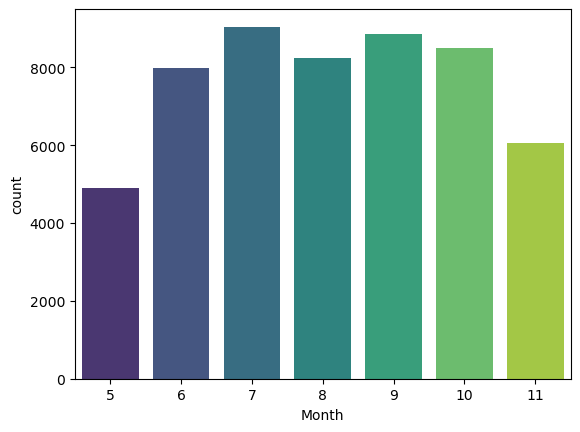

In [42]:
sns.countplot(x= 'Month', data= df, palette= 'viridis')
plt.xlabel='Month'
plt.ylabel='Number of Earthquake'
plt.title='Monthly Earthquake Distribution'
plt.show()

# Weekdays Earthquake Distribution

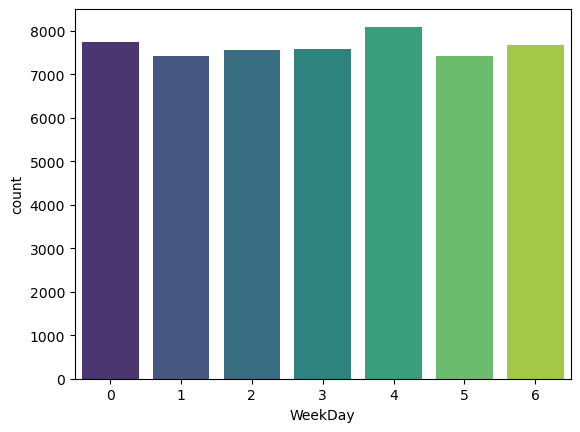

In [49]:
sns.countplot(x= 'WeekDay', data= df, palette= 'viridis')
plt.xlabel='WeekDay'
plt.ylabel='Number of Earthquake'
plt.title='Weekdays Earthquake Distribution'
plt.show()

# Hourly Earthquake Distribution

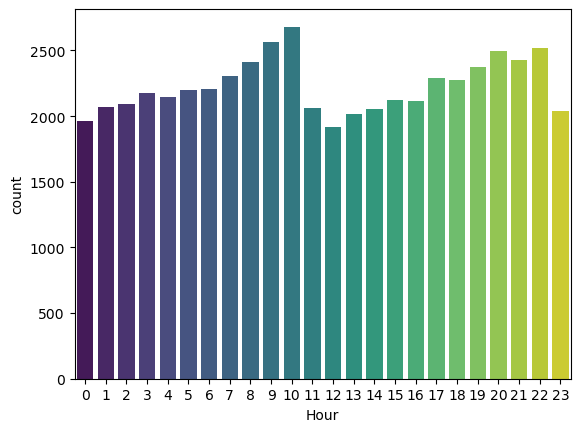

In [51]:
sns.countplot(x= 'Hour', data= df, palette= 'viridis')
plt.xlabel='Hour'
plt.ylabel='Number of Earthquake'
plt.title='Hourly Earthquake Distribution'
plt.show()

# Geographical Patterns

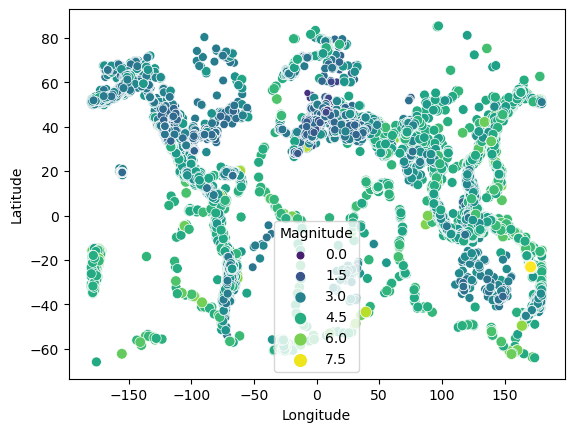

In [18]:
sns.scatterplot(x= 'Longitude', y= 'Latitude', data= df, hue= 'Magnitude', size= 'Magnitude', palette= 'viridis')
plt.xlabel= 'Longitude'
plt.ylabel= 'Latitude'
plt.title= 'Geographically Earthquake Distribution'
plt.show()

# Depth & Magnitude Correlation

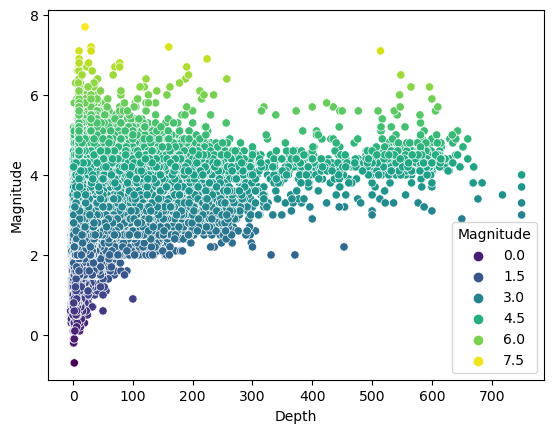

In [27]:
sns.scatterplot(x= 'Depth', y= 'Magnitude', data= df, hue= 'Magnitude', palette= 'viridis')
plt.xlabel= 'Depth'
plt.ylabel= 'Magnitude'
plt.title='Relation Between Depth & Magnitude'
plt.show()

# Impact on Different Land Types

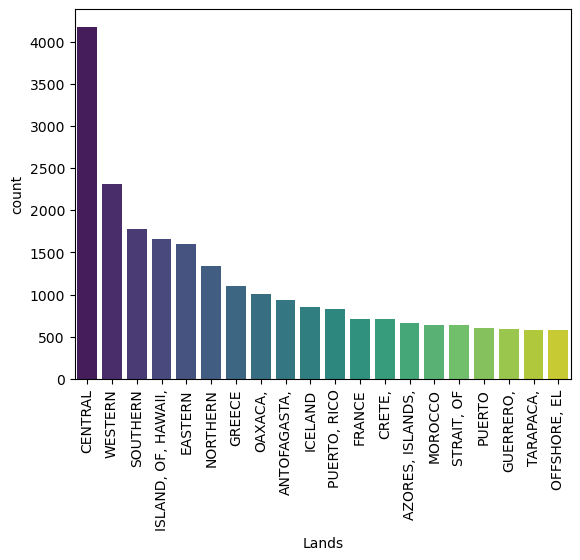

In [40]:
top_lands= 20
sns.countplot(x= 'Lands', data= df, order= df['Lands'].value_counts().index[:top_lands], palette= 'viridis')
plt.xlabel= 'Lands'
plt.ylabel= 'Number of Earthquake'
plt.title= 'Land Types Earthquake Distribution'
plt.xticks(rotation= 90)
plt.show()

# Country Specific Analysis

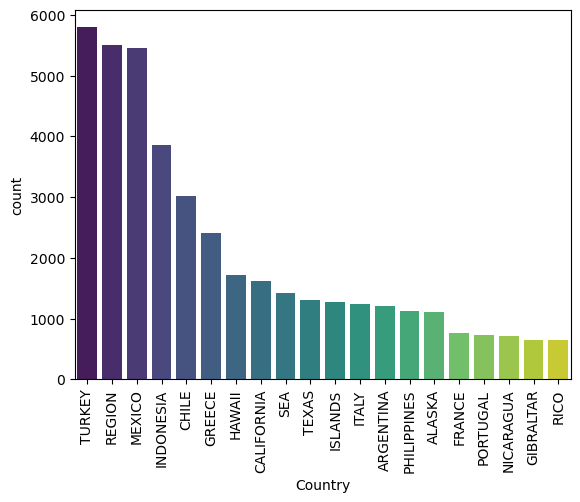

In [41]:
top_countries= 20
sns.countplot(x= 'Country', data= df, order = df['Country'].value_counts().index[:top_countries], palette= 'viridis')
plt.xlable= 'Country'
plt.ylabel= 'Number of Earthquake'
plt.title= 'Country wise Earthquake Distribution'
plt.xticks(rotation = 90)
plt.show()

# Dashboard of Earthquakes 2023 Analysis

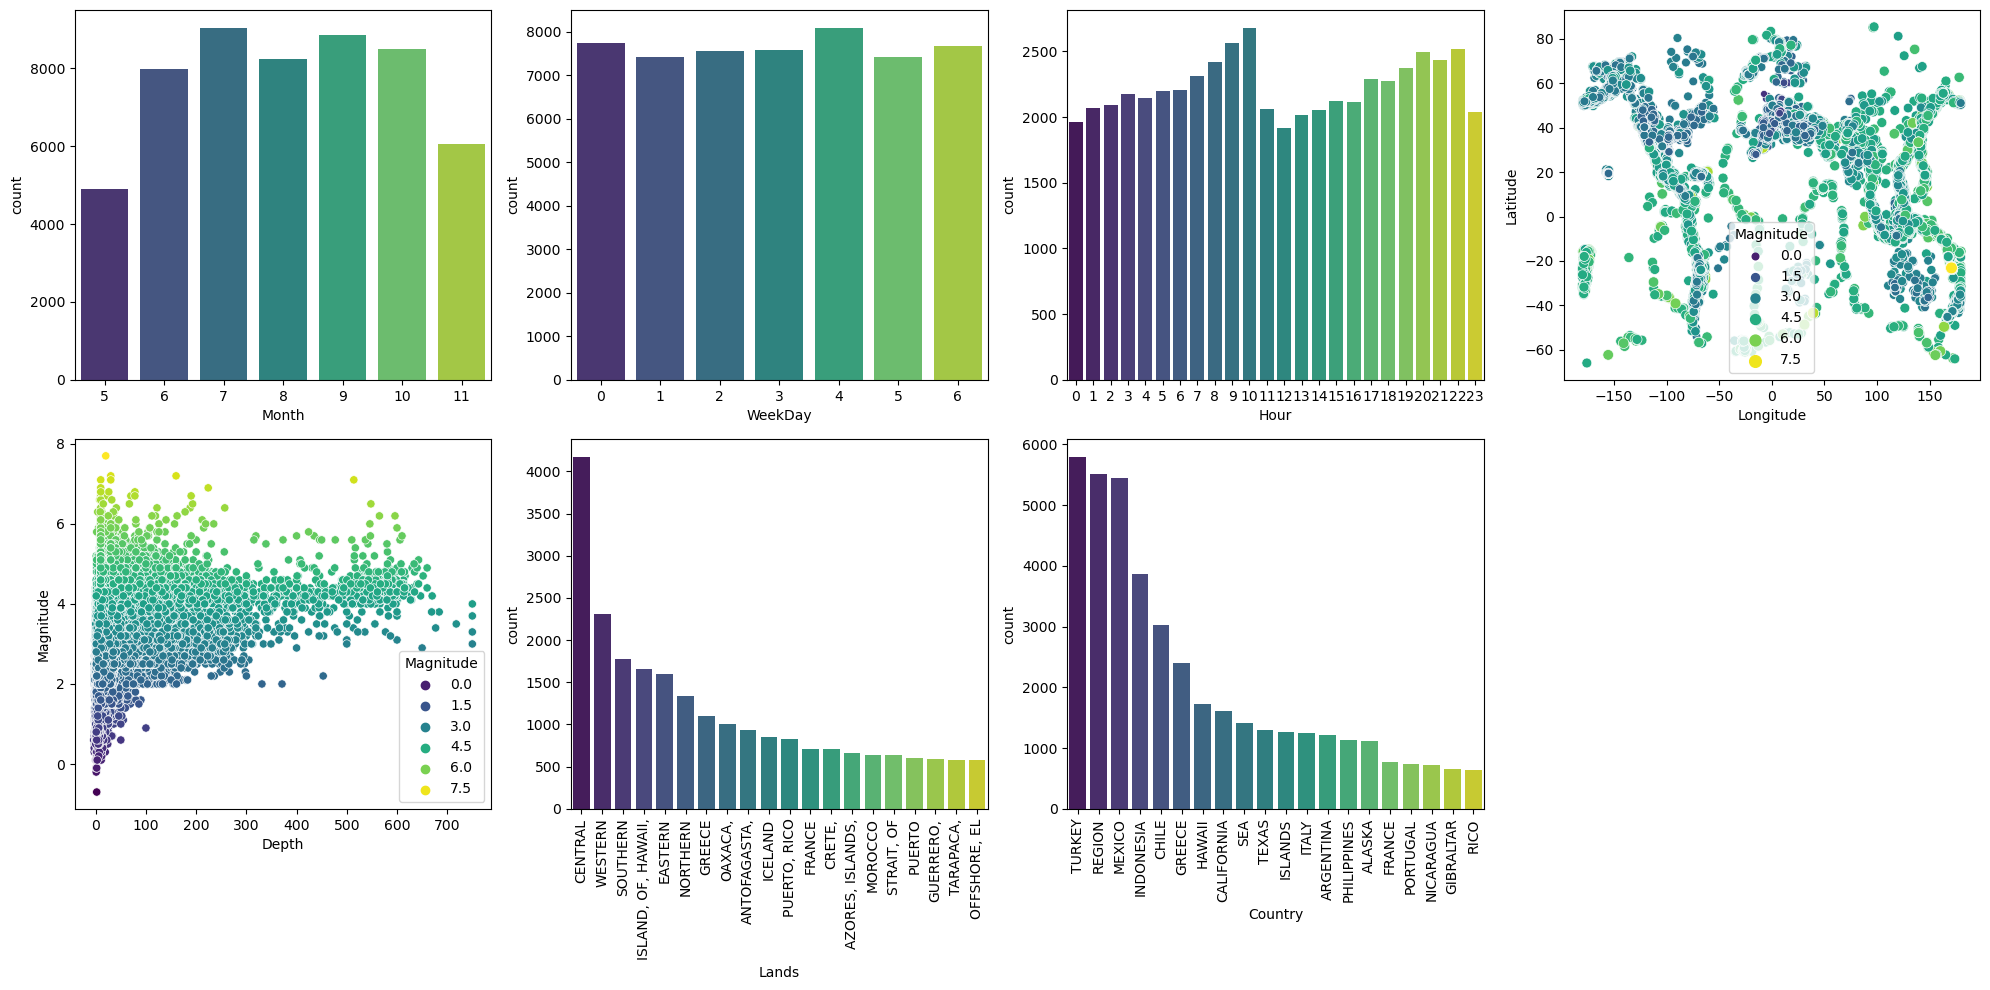

In [58]:
fig, axes= plt.subplots(nrows= 2, ncols=4, figsize= (20,10))

# Monthly Earthquake Distribution
sns.countplot(x= 'Month', data= df, palette= 'viridis', ax= axes[0,0])
axes[0,0].set_xlabel='Month'
axes[0,0].set_ylabel='Number of Earthquake'
axes[0,0].set_title='Monthly Earthquake Distribution'

# Weekdays Earthquake Distribution
sns.countplot(x= 'WeekDay', data= df, palette= 'viridis', ax= axes[0,1])
axes[0,1].set_xlabel='WeekDay'
axes[0,1].set_ylabel='Number of Earthquake'
axes[0,1].set_title='Weekdays Earthquake Distribution'

# Hourly Earthquake Distribution
sns.countplot(x= 'Hour', data= df, palette= 'viridis', ax= axes[0,2])
axes[0,2].set_xlabel='Hour'
axes[0,2].set_ylabel='Number of Earthquake'
axes[0,2].set_title='Hourly Earthquake Distribution'

# Geographical Patterns
sns.scatterplot(x= 'Longitude', y= 'Latitude', data= df, hue= 'Magnitude', size= 'Magnitude', palette= 'viridis', ax= axes[0,3])
axes[0,3].set_xlabel= 'Longitude'
axes[0,3].set_ylabel= 'Latitude'
axes[0,3].set_title= 'Geographically Earthquake Distribution'

# Depth & Magnitude Correlation
sns.scatterplot(x= 'Depth', y= 'Magnitude', data= df, hue= 'Magnitude', palette= 'viridis', ax= axes[1,0])
axes[1,0].set_xlabel= 'Depth'
axes[1,0].set_ylabel= 'Magnitude'
axes[1,0].set_title='Relation Between Depth & Magnitude'

# Impact on Different Land Types
top_lands= 20
sns.countplot(x= 'Lands', data= df, order= df['Lands'].value_counts().index[:top_lands], palette= 'viridis', ax= axes[1,1])
axes[1,1].set_xlabel= 'Lands'
axes[1,1].set_ylabel= 'Number of Earthquake'
axes[1,1].set_title= 'Land Types Earthquake Distribution'
axes[1,1].tick_params(axis= 'x', rotation= 90)

# Country Specific Analysis
top_countries= 20
sns.countplot(x= 'Country', data= df, order = df['Country'].value_counts().index[:top_countries], palette= 'viridis', ax= axes[1,2])
axes[1,2].set_xlable= 'Country'
axes[1,2].set_ylabel= 'Number of Earthquake'
axes[1,2].set_title= 'Country wise Earthquake Distribution'
axes[1,2].tick_params(axis= 'x', rotation = 90)

fig.delaxes(axes[1,-1])
plt.tight_layout()
plt.show()